#### IMORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras_sequential_ascii import keras2ascii

#### DATA PREPROCESSING : 

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [10]:
X_test

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

#### MACHINE LEARNING MODEL  : 

In [11]:

svm_model = SVC()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()

In [12]:
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
score=[]

In [15]:
s=[]
s.append('Support Vector Machine   ')
s.append(accuracy_score(y_test, svm_pred))
s.append(precision_score(y_test, svm_pred))
s.append(recall_score(y_test, svm_pred))
s.append(f1_score(y_test, svm_pred))
score.append(s)

In [16]:
s=[]
s.append('Random Forest Classifier')
s.append(accuracy_score(y_test, rf_pred))
s.append(precision_score(y_test, rf_pred))
s.append(recall_score(y_test, rf_pred))
s.append(f1_score(y_test, rf_pred))
score.append(s)

In [17]:
s=[]
s.append('Logistic Regression      ')
s.append(accuracy_score(y_test, lr_pred))
s.append(precision_score(y_test, lr_pred))
s.append(recall_score(y_test, lr_pred))
s.append(f1_score(y_test, lr_pred))
score.append(s)

In [18]:
s=[]
s.append('K-Nearest Neighbour       ')
s.append(accuracy_score(y_test, knn_pred))
s.append(precision_score(y_test, knn_pred))
s.append(recall_score(y_test, knn_pred))
s.append(f1_score(y_test, knn_pred))
score.append(s)

#### MACHINE LEARNING MODEL RESULTS : 

In [19]:
print('Model\t\t\t\tAccuracy\tPrecision\tRecall\t\tF1-score')
for s in score:
    for i in s:
        if(type(i)!=str):
            print('{:.3f}'.format(i), end='\t\t')
        else:
            print(i, end='\t')
    print()

Model				Accuracy	Precision	Recall		F1-score
Support Vector Machine   	0.734		0.646		0.564		0.602		
Random Forest Classifier	0.753		0.649		0.673		0.661		
Logistic Regression      	0.753		0.649		0.673		0.661		
K-Nearest Neighbour       	0.695		0.583		0.509		0.544		


## ANN MODEL

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [21]:
initial_weights = model.get_weights()
# initial_weights

#### MODEL SUMMARY: 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

#### Model Visualization :

In [23]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           8
               Dense   XXXXX -------------------      1152     4.0%
                relu   #####         128
             Dropout    | || -------------------         0     0.0%
                       #####         128
               Dense   XXXXX -------------------     16512    56.8%
                relu   #####         128
             Dropout    | || -------------------         0     0.0%
                       #####         128
               Dense   XXXXX -------------------      8256    28.4%
                relu   #####          64
             Dropout    | || -------------------         0     0.0%
                       #####          64
               Dense   XXXXX -------------------      2080     7.2%
                 elu   #####          32
             Dropout    | || -------------------         0     0.0%
                       #####          32
             

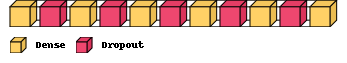

In [24]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)


#### MODEL TRAINING : 

In [25]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="max",
    start_from_epoch=27,
)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[callback])

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 0.7626 - accuracy: 0.5244 - val_loss: 0.6322 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.6042 - val_loss: 0.6149 - val_accuracy: 0.6818
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.6629 - val_loss: 0.5909 - val_accuracy: 0.7013
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6270 - val_loss: 0.5692 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6775 - val_loss: 0.5504 - val_accuracy: 0.7338
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.7068 - val_loss: 0.5378 - val_accuracy: 0.7597
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5798 - accuracy: 0.6775 - val_loss: 0.5297 - val_accuracy: 0.7338
Epoch 8/100


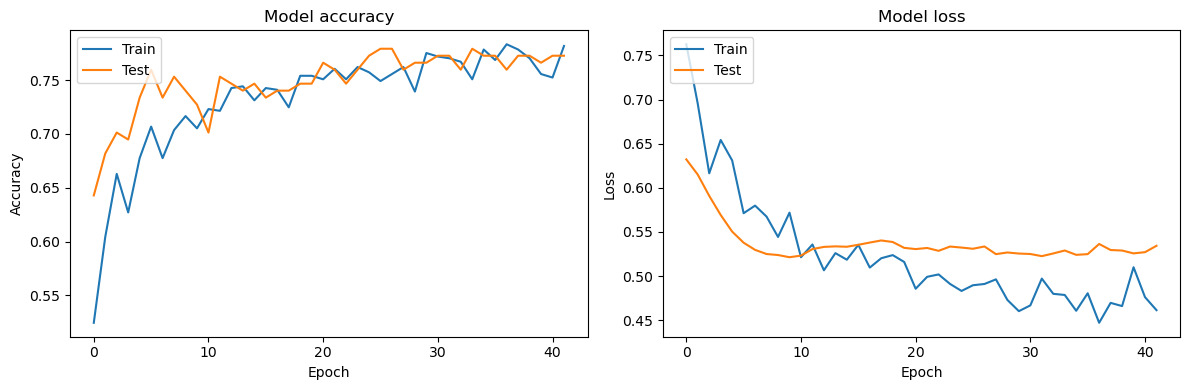

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

#### MODEL TESTING : 

In [28]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Deep Learning Model -')
print(f"Accuracy  = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall    = {recall}")
print(f"F1-Score  = {f1}")

5/5 [==============================] - 0s 4ms/step
Deep Learning Model -
Accuracy  = 0.7727272727272727
Precision = 0.6923076923076923
Recall    = 0.6545454545454545
F1-Score  = 0.6728971962616823
